#### General Analysis on GSE164522 Dataset
This notebook focuses on the analysis of the GSE164522 dataset and its different tissue. The analysis inlcudes publicity, MAIT cells, J/V gene usage, unique sequences, and sequence tissue overlap.

#### Set Environment

In [1]:
import pandas as pd
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import logomaker
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

from notebook_utils import plot_count, label_MAIT_single_cell

#### Load and Prepare Data

In [2]:
GSE164522_data_df = pd.read_csv('~/CODON_CVC/single_cell_data/GSE164522_colon_data/GSE164522_all_labels.csv')
GSE164522_data_df

,Unnamed: 0,barcode,patient,cdr3_aa,cdr3_nt,v_gene,j_gene,tissue
0,0,CAAGAAATCAGGCAAG-1,P08,CAARDGQKLLF,TGCGCCGCTCGAGATGGCCAGAAGCTGCTCTTT,TRAV1-1,TRAJ16,MT
1,1,CCGTACTAGAGGTACC-1,P08,CAPRDAGNMLTF,TGCGCTCCCAGAGACGCAGGCAACATGCTCACCTTT,TRAV1-1,TRAJ39,PT
2,2,CAGGTGCGTATTAGCC-1,P08,CAPWRANNLFF,TGCGCTCCGTGGAGGGCAAACAACCTCTTCTTT,TRAV1-1,TRAJ36,MN
3,3,TGACGGCTCGTCGTTC-1,P08,CAENDYKLSF,TGCGCTGAGAACGACTACAAGCTCAGCTTT,TRAV1-1,TRAJ20,MT
4,4,CGGACGTTCGCTTAGA-1,P08,CAGGYNQGGKLIF,TGCGCTGGGGGCTATAACCAGGGAGGAAAGCTTATCTTC,TRAV1-1,TRAJ23,PN
...,...,...,...,...,...,...,...,...
165289,165293,GTTCGGGCATTCTCAT-1,P17,CSVEGEREFSDTQYF,TGCAGCGTTGAGGGTGAGCGGGAGTTTTCAGATACGCAGTATTTT,TRBV29-1,TRBJ2-3,MT
165290,165294,ACGATACCAAGTACCT-1,P17,CASSYDSGREQFF,TGTGCCAGCAGTTATGATAGTGGACGCGAGCAGTTCTTC,TRBV5-4,TRBJ2-1,LN
165291,165295,TGAGAGGAGCGAAGGG-1,P17,CASSVGTSGGADEQFF,TGTGCCAGCAGCGTAGGGACTAGCGGGGGGGCTGATGAGCAGTTCTTC,TRBV9,TRBJ2-1,LN
165292,165296,GGTATTGAGGTGCAAC-1,P17,CASSLTSGSSQETQYF,TGTGCCAGCAGCTTGACTAGCGGGAGTTCACAAGAGACCCAGTACTTC,TRBV5-5,TRBJ2-5,MT


In [3]:
collections.Counter(GSE164522_data_df['patient'])

Counter({'P12': 26415,
         'P17': 23379,
         'P13': 21984,
         'P14': 19752,
         'P15': 17016,
         'P16': 16512,
         'P09': 13280,
         'P10': 10918,
         'P11': 9578,
         'P08': 6460})

##### Add Publicity Information

In [4]:
# Count unique patients for each cdr3_aa sequence
cdr3_aa_publicity = GSE164522_data_df.groupby('cdr3_aa')['patient'].nunique().reset_index(name='unique_patients')

# Determine if the cdr3_aa sequence is public or private
cdr3_aa_publicity['publicity'] = (cdr3_aa_publicity['unique_patients'] > 1).astype(int)

# Merge the publicity information back into the original dataframe
GSE164522_data_df = GSE164522_data_df.merge(cdr3_aa_publicity[['cdr3_aa', 'publicity']], on='cdr3_aa', how='left')


In [5]:
# Calculate in how many different patients each sequence appears
sequence_patient_count = GSE164522_data_df.groupby('cdr3_aa')['patient'].nunique().reset_index(name='patient_count')

# Merge this information back into the original dataframe
GSE164522_data_df = pd.merge(GSE164522_data_df, sequence_patient_count, on='cdr3_aa', how='left')

In [6]:
# add chain column by using v_gene name: if starts with TRA, then chain is TRA, if starts with TRB, then chain is TRB
GSE164522_data_df['chain'] = GSE164522_data_df['v_gene'].apply(lambda x: 'TRA' if x.startswith('TRAV') else 'TRB')
GSE164522_data_df


,Unnamed: 0,barcode,patient,cdr3_aa,cdr3_nt,v_gene,j_gene,tissue,publicity,patient_count,chain
0,0,CAAGAAATCAGGCAAG-1,P08,CAARDGQKLLF,TGCGCCGCTCGAGATGGCCAGAAGCTGCTCTTT,TRAV1-1,TRAJ16,MT,0,1,TRA
1,1,CCGTACTAGAGGTACC-1,P08,CAPRDAGNMLTF,TGCGCTCCCAGAGACGCAGGCAACATGCTCACCTTT,TRAV1-1,TRAJ39,PT,0,1,TRA
2,2,CAGGTGCGTATTAGCC-1,P08,CAPWRANNLFF,TGCGCTCCGTGGAGGGCAAACAACCTCTTCTTT,TRAV1-1,TRAJ36,MN,0,1,TRA
3,3,TGACGGCTCGTCGTTC-1,P08,CAENDYKLSF,TGCGCTGAGAACGACTACAAGCTCAGCTTT,TRAV1-1,TRAJ20,MT,1,2,TRA
4,4,CGGACGTTCGCTTAGA-1,P08,CAGGYNQGGKLIF,TGCGCTGGGGGCTATAACCAGGGAGGAAAGCTTATCTTC,TRAV1-1,TRAJ23,PN,1,2,TRA
...,...,...,...,...,...,...,...,...,...,...,...
165289,165293,GTTCGGGCATTCTCAT-1,P17,CSVEGEREFSDTQYF,TGCAGCGTTGAGGGTGAGCGGGAGTTTTCAGATACGCAGTATTTT,TRBV29-1,TRBJ2-3,MT,0,1,TRB
165290,165294,ACGATACCAAGTACCT-1,P17,CASSYDSGREQFF,TGTGCCAGCAGTTATGATAGTGGACGCGAGCAGTTCTTC,TRBV5-4,TRBJ2-1,LN,0,1,TRB
165291,165295,TGAGAGGAGCGAAGGG-1,P17,CASSVGTSGGADEQFF,TGTGCCAGCAGCGTAGGGACTAGCGGGGGGGCTGATGAGCAGTTCTTC,TRBV9,TRBJ2-1,LN,0,1,TRB
165292,165296,GGTATTGAGGTGCAAC-1,P17,CASSLTSGSSQETQYF,TGTGCCAGCAGCTTGACTAGCGGGAGTTCACAAGAGACCCAGTACTTC,TRBV5-5,TRBJ2-5,MT,0,1,TRB


#### Publicicty Per Tissue Type

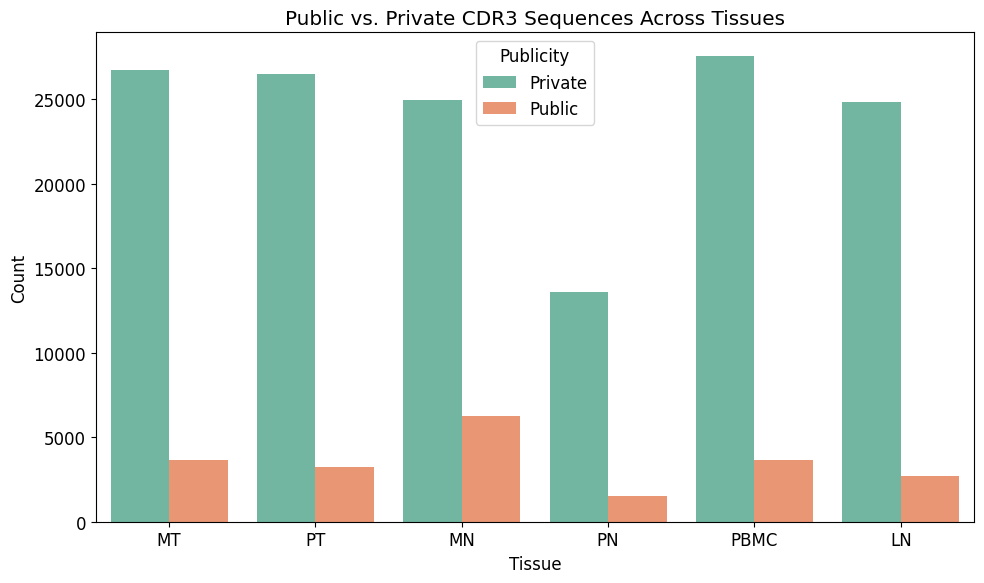

In [8]:
# Countplot of publicity across tissues
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10, 6))
sns.countplot(data=GSE164522_data_df, x='tissue', hue='publicity', palette='Set2')
plt.title('Public vs. Private CDR3 Sequences Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('Count')
plt.legend(title='Publicity', labels=['Private', 'Public'])
plt.tight_layout()
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/binary_publicity_across_tissues.png', dpi=1200)
plt.show()

Sequence Abundance by Publicity, per Tissue

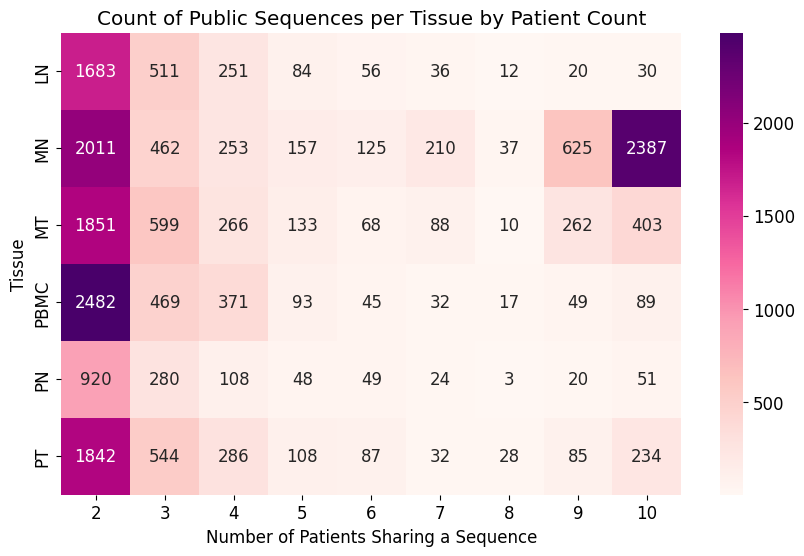

In [10]:
# Filter out private sequences
public_df = GSE164522_data_df[GSE164522_data_df['publicity'] == 1]

patient_sequence_count = public_df.groupby('tissue')['patient_count'].value_counts().reset_index(name='sequence_count')

# Correcting the pivot call with keyword arguments
heatmap_data = patient_sequence_count.pivot(index="tissue", columns="patient_count", values="sequence_count")

# Now, plotting the heatmap
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="RdPu", fmt="g")
plt.title('Count of Public Sequences per Tissue by Patient Count')
plt.xlabel('Number of Patients Sharing a Sequence')
plt.ylabel('Tissue')
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/heatmap_publicity_count_across_tissues.png', dpi=1200)
plt.show()


#### J Gene Usage

This analysis can be done on individual tissues or on the whole dataset.

In [ ]:
# subset with speciifc tissue type
GSE164522_data_df_MT = GSE164522_data_df[GSE164522_data_df['tissue'] == 'MT']
GSE164522_data_df_PBMC = GSE164522_data_df[GSE164522_data_df['tissue'] == 'PBMC']

/tmp/ipykernel_56406/522633839.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=GSE164522_data_df_MT, x='j_gene', order=gene_order, palette='Pastel1')


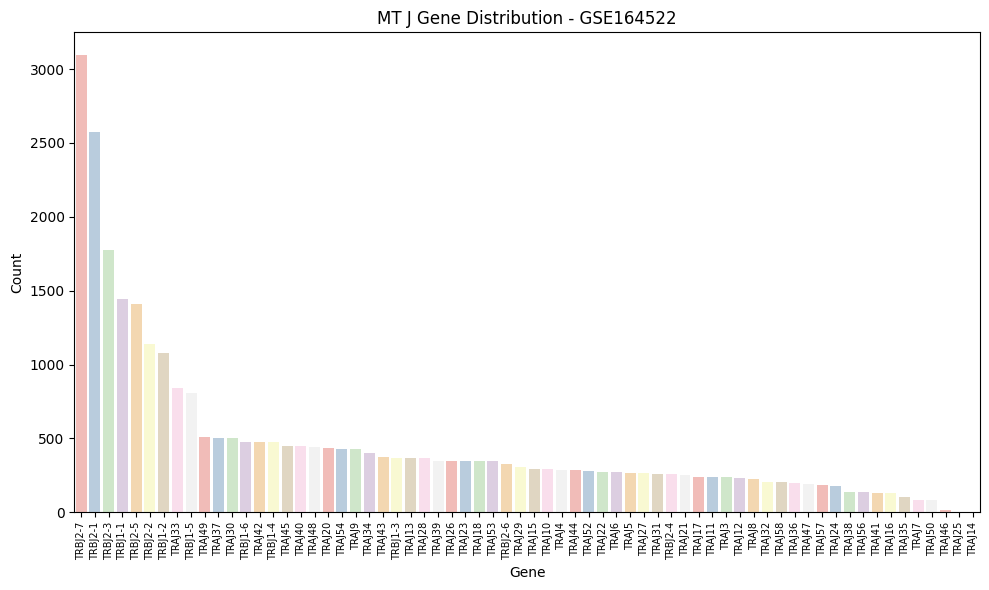

In [287]:
# Count the occurrences and sort them
gene_order = GSE164522_data_df_MT['j_gene'].value_counts().sort_values(ascending=False).index

# plot
plot_count(df=GSE164522_data_df_MT, X='j_gene', order=gene_order, title='MT J Gene Distribution - GSE164522', 
    xlabel='Gene', rotation=90, palette='Pastel1')

/tmp/ipykernel_671731/1365969450.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=GSE164522_data_df_PBMC, x='j_gene', order=gene_order_PBMC, palette='Pastel1')


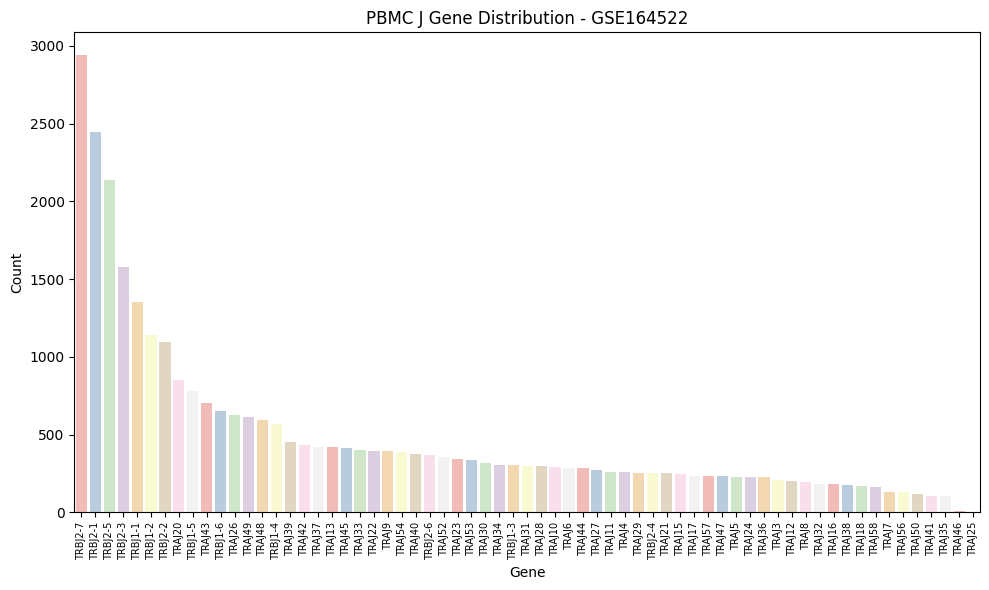

In [11]:
# Count the occurrences and sort them
gene_order_PBMC = GSE164522_data_df_PBMC['j_gene'].value_counts().sort_values(ascending=False).index

# plot 
plot_count(df=GSE164522_data_df_PBMC, X='j_gene', order=gene_order_PBMC, title='PBMC J Gene Distribution - GSE164522', 
    xlabel='Gene', rotation=90, palette='Pastel1')

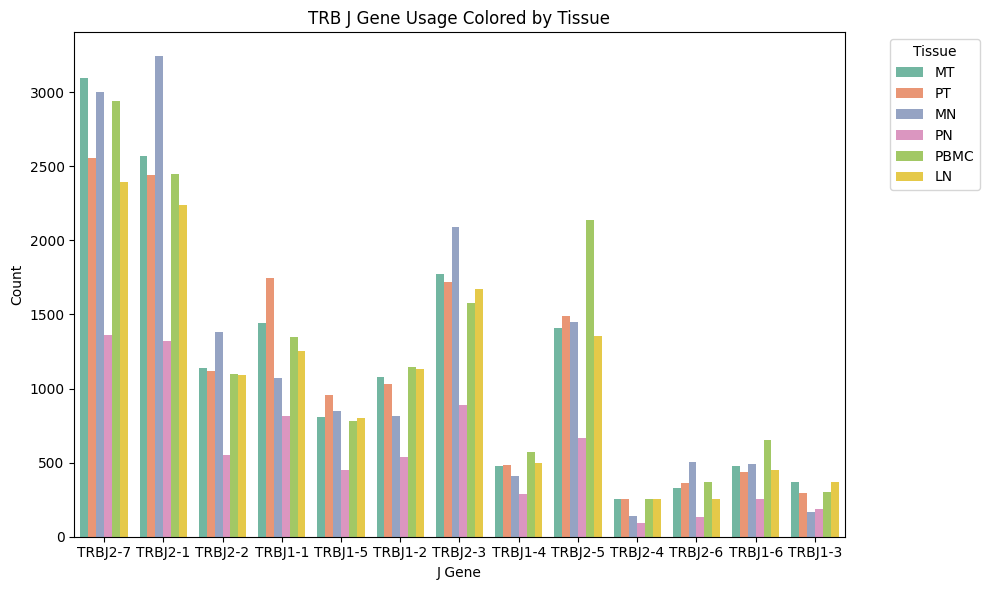

In [12]:
GSE164522_data_df_TRB_J = GSE164522_data_df[GSE164522_data_df['j_gene'].str.contains('TRBJ')]

# Plotting TRB J gene usage colored by tissue
plot_count(df=GSE164522_data_df_TRB_J, X='j_gene', hue='tissue', title='TRB J Gene Usage Colored by Tissue', 
    xlabel='J Gene', legend_title='Tissue', 
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/trb_j_gene_usage_across_tissues.png', 
    palette='Set2')


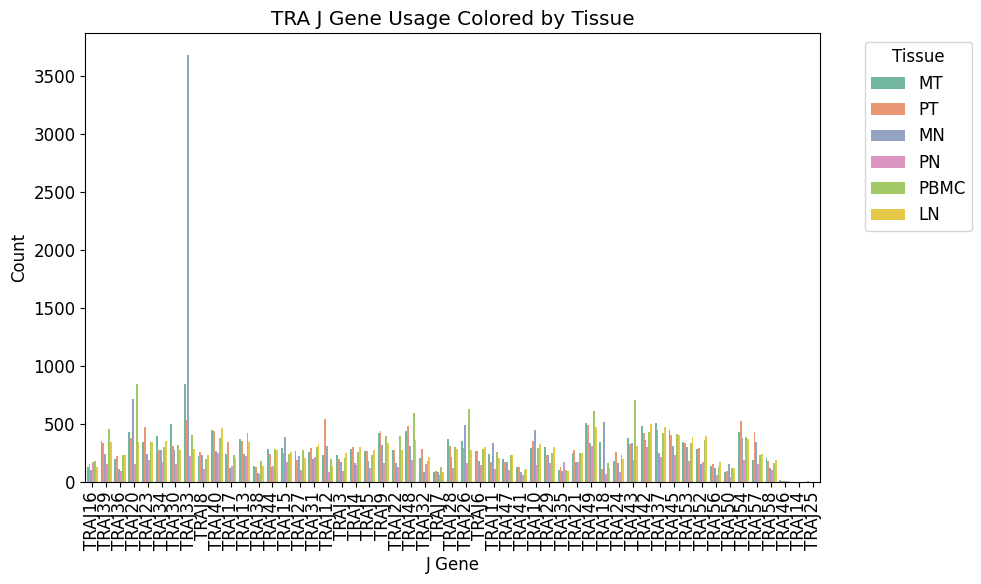

In [12]:
GSE164522_data_df_TRA_J = GSE164522_data_df[GSE164522_data_df['j_gene'].str.contains('TRAJ')]

# Plotting TRA J gene usage colored by tissue
plot_count(df=GSE164522_data_df_TRA_J, X='j_gene', hue='tissue', title='TRA J Gene Usage Colored by Tissue', 
    xlabel='J Gene', legend_title='Tissue', rotation=90,
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/tra_j_gene_usage_across_tissues.png', 
    palette='Set2')

#### V Gene Usage

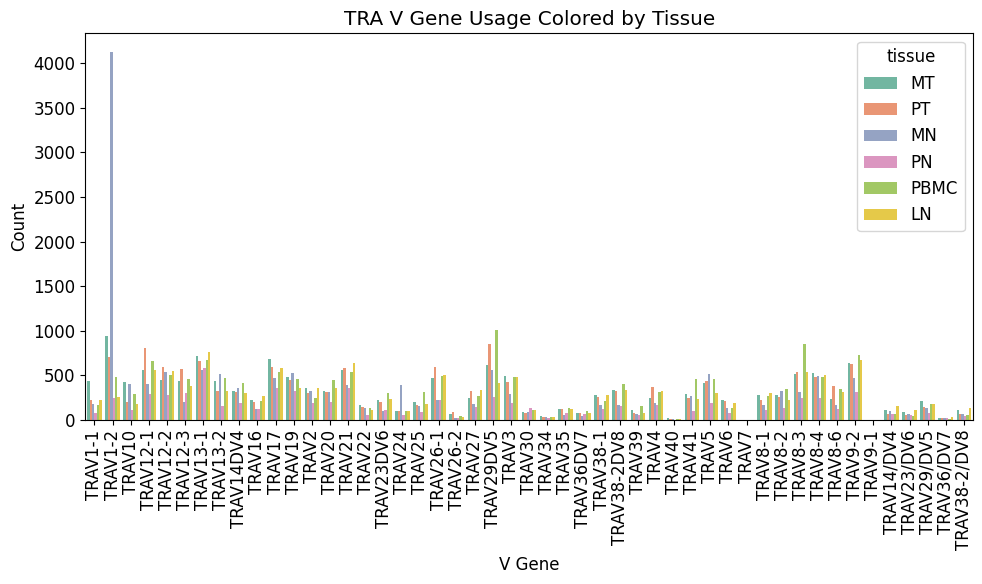

In [21]:
# Count the occurrences and sort them
# gene_order = GSE164522_data_df['v_gene'].value_counts().sort_values(ascending=False).index
GSE164522_data_df_TRA_V = GSE164522_data_df[GSE164522_data_df['v_gene'].str.contains('TRAV')]

# Plotting TRA V gene usage colored by tissue
plot_count(
    df=GSE164522_data_df_TRA_V, X='v_gene', hue='tissue', title='TRA V Gene Usage Colored by Tissue', xlabel='V Gene', 
    legend_title='Tissue', rotation=90,
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/tra_v_gene_usage_across_tissues.png', 
    palette='Set2')

/tmp/ipykernel_671731/2661233310.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=GSE164522_data_df_PBMC, x='v_gene', order=gene_order_PBMC, palette='Pastel1')


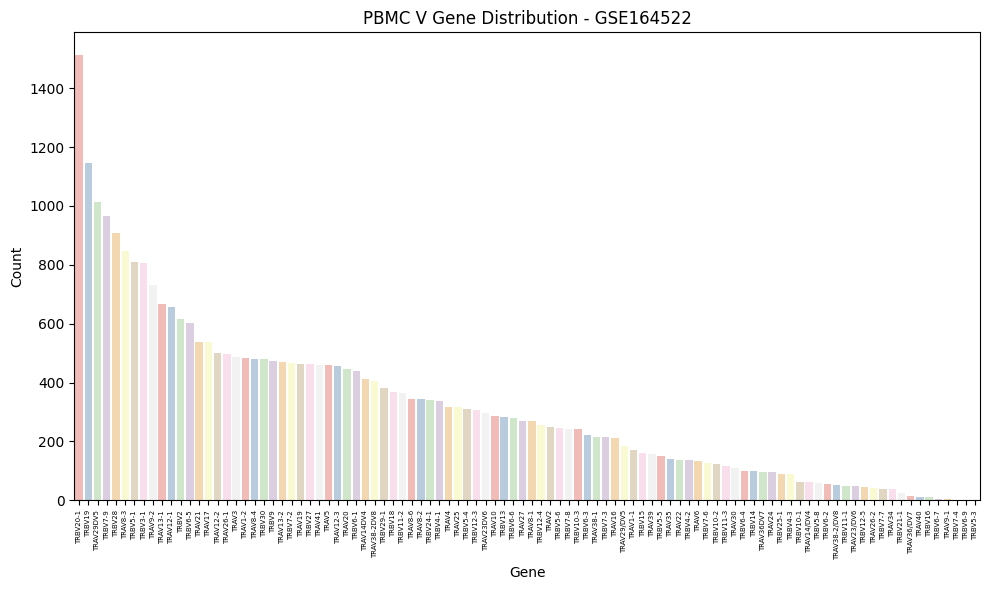

In [15]:
# Count the occurrences and sort them
gene_order_PBMC = GSE164522_data_df_PBMC['v_gene'].value_counts().sort_values(ascending=False).index

# plot
plot_count(df=GSE164522_data_df_PBMC, X='v_gene', order=gene_order_PBMC, title='PBMC V Gene Distribution - GSE164522', 
    xlabel='Gene', rotation=90,palette='Pastel1')

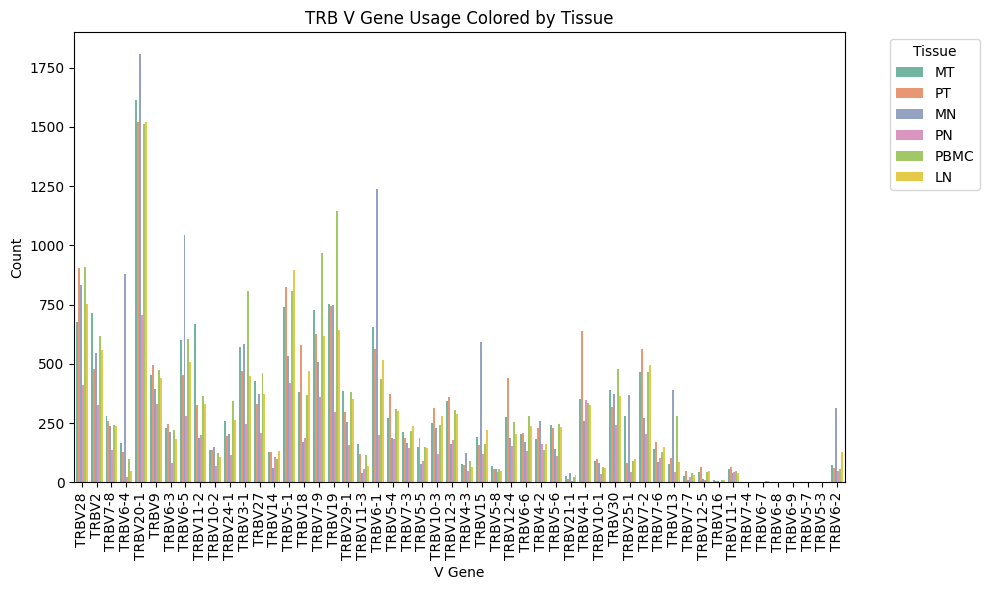

In [16]:
GSE164522_data_df_TRB_V = GSE164522_data_df[GSE164522_data_df['v_gene'].str.contains('TRBV')]

# plot
plot_count(df=GSE164522_data_df_TRB_V, X='v_gene', hue='tissue', title='TRB V Gene Usage Colored by Tissue', 
    xlabel='V Gene', legend_title='Tissue', rotation=90,
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/trb_v_gene_usage_across_tissues.png', 
    palette='Set2')

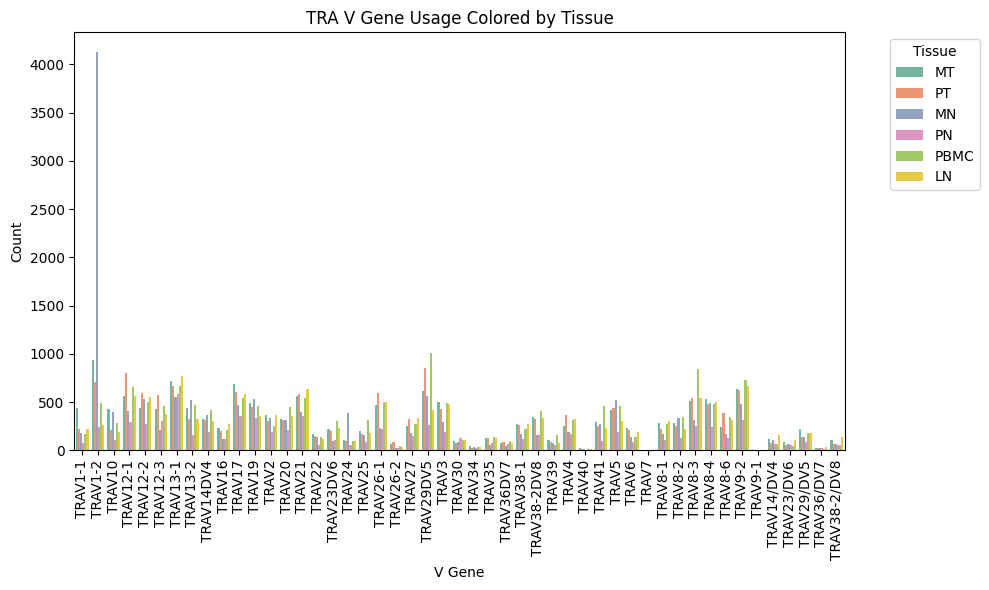

In [17]:
GSE164522_data_df_TRB_V = GSE164522_data_df[GSE164522_data_df['v_gene'].str.contains('TRAV')]

# plot - V gene usage colored by tissue
plot_count(df=GSE164522_data_df_TRB_V, X='v_gene', hue='tissue', title='TRA V Gene Usage Colored by Tissue', 
    xlabel='V Gene', legend_title='Tissue', rotation=90,
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/tra_v_gene_usage_across_tissues.png', 
    palette='Set2')

#### MAIT

##### Label MAIT

In [8]:
# classifying the cells as MAIT cells or not
MAIT_v_gene='TRAV1-2'
MAIT_j_gene = ['TRAJ33', 'TRAJ20', 'TRAJ12']

v_gene_to_use = MAIT_v_gene
j_gene_to_use = MAIT_j_gene
cell_label_to_use = 'MAIT_cell'

In [10]:
GSE164522_data_df_MAIT = label_MAIT_single_cell(GSE164522_data_df, v_gene_to_use, j_gene_to_use, cell_label_to_use)

/tmp/ipykernel_402025/3309202304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_df_tra[cell_label] = np.where((sc_df_tra['v_gene'] == v_gene_list) &


#### VDJ MAIT Label Comparison with Gene Expression MAIT Label


In [11]:
# load labeled vdj data
vdj_cd8 = pd.read_csv("~/CODON_CVC/single_cell_data/GSE164522_colon_data/vdj_cd8_full.csv")
vdj_cd4 = pd.read_csv("~/CODON_CVC/single_cell_data/GSE164522_colon_data/vdj_cd4_full.csv")
vdj_cd8_cd4 = pd.concat([vdj_cd8, vdj_cd4], axis=0)
# subset vdj_cd8_cd4 with celltype_sub that contains the work MAIT
vdj_cd8_cd4_MAIT = vdj_cd8_cd4[vdj_cd8_cd4['celltype_sub'].str.contains('MAIT')]
vdj_cd8_cd4_MAIT_barcodes = vdj_cd8_cd4_MAIT['barcode'].tolist()

In [12]:
GSE164522_data_df_MAIT_only = GSE164522_data_df_MAIT[GSE164522_data_df_MAIT['MAIT_cell'] == 'MAIT_cell']

# subset GSE164522_data_df_MAIT with barcodes that are in vdj_cd8_cd4_MAIT_barcodes
GSE164522_data_df_MAIT_barcodes = GSE164522_data_df_MAIT_only['barcode'].tolist()
GSE164522_data_df_MAIT_barcodes = set(GSE164522_data_df_MAIT_barcodes)
vdj_cd8_cd4_MAIT_barcodes = set(vdj_cd8_cd4_MAIT_barcodes)
common_barcodes = GSE164522_data_df_MAIT_barcodes.intersection(vdj_cd8_cd4_MAIT_barcodes)
common_barcodes = list(common_barcodes)

print(f"Number of common barcodes between GSE164522_data_df_MAIT and vdj_cd8_cd4_MAIT: {len(common_barcodes)}")
print(f"Number of barcodes in GSE164522_data_df_MAIT: {len(GSE164522_data_df_MAIT_barcodes)}")
print(f"Number of barcodes in vdj_cd8_cd4_MAIT: {len(vdj_cd8_cd4_MAIT_barcodes)}")

Number of common barcodes between GSE164522_data_df_MAIT and vdj_cd8_cd4_MAIT: 4513
Number of barcodes in GSE164522_data_df_MAIT: 5369
Number of barcodes in vdj_cd8_cd4_MAIT: 6576


In [13]:
# what are the barcodes that are in vdj_cd8_cd4_MAIT but not in GSE164522_data_df_MAIT
vdj_cd8_cd4_MAIT_not_in_GSE164522_data_df_MAIT = vdj_cd8_cd4_MAIT_barcodes - GSE164522_data_df_MAIT_barcodes
print(f"Number of barcodes in vdj_cd8_cd4_MAIT but not in GSE164522_data_df_MAIT: {len(vdj_cd8_cd4_MAIT_not_in_GSE164522_data_df_MAIT)}")

Number of barcodes in vdj_cd8_cd4_MAIT but not in GSE164522_data_df_MAIT: 2063


In [14]:
# adjust the MAIT cell labels in GSE164522_data_df_MAIT_only to match the labels in vdj_cd8_cd4_MAIT
GSE164522_data_df_MAIT['MAIT_cell'] = np.where(GSE164522_data_df_MAIT['barcode'].isin(common_barcodes), 'MAIT_cell', 'non-MAIT_cell')

# export
# GSE164522_data_df_MAIT.to_csv("~/CODON_CVC/single_cell_data/GSE164522_colon_data/GSE164522_all_labels_publicity_MAIT.csv")

##### Plot Analysis

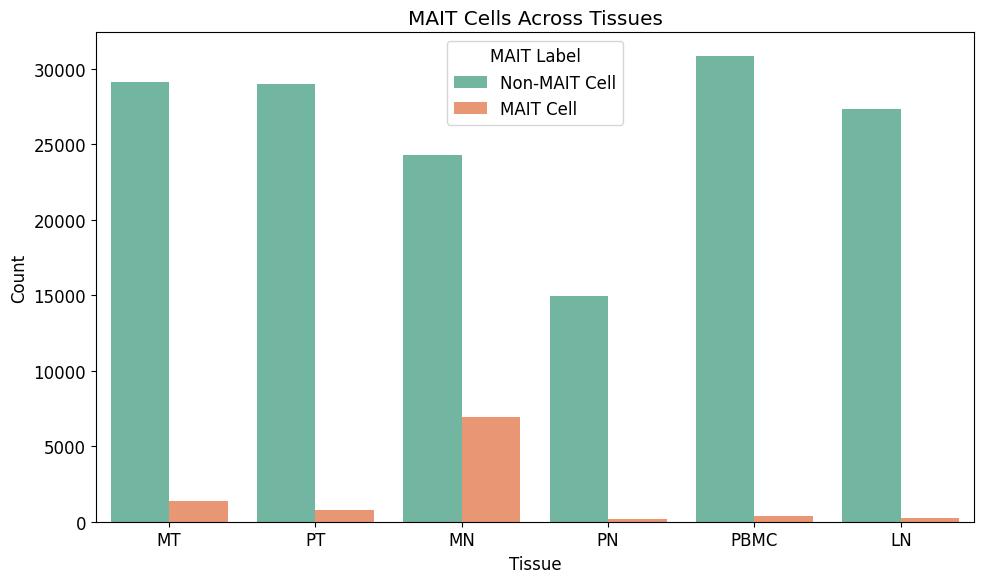

In [29]:
# plot MAIT across tissues
plot_count(df=GSE164522_data_df_MAIT, X='tissue', hue='MAIT_cell', title='MAIT Cells Across Tissues', xlabel='Tissue', 
    legend_title='MAIT Label', labels=['Non-MAIT Cell', 'MAIT Cell'], 
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/mait_cells_across_tissues.png', 
    palette='Set2')

##### MAIT Publicity

In [ ]:
MAIT_df = GSE164522_data_df_MAIT[GSE164522_data_df_MAIT['MAIT_cell'] == 'MAIT_cell']

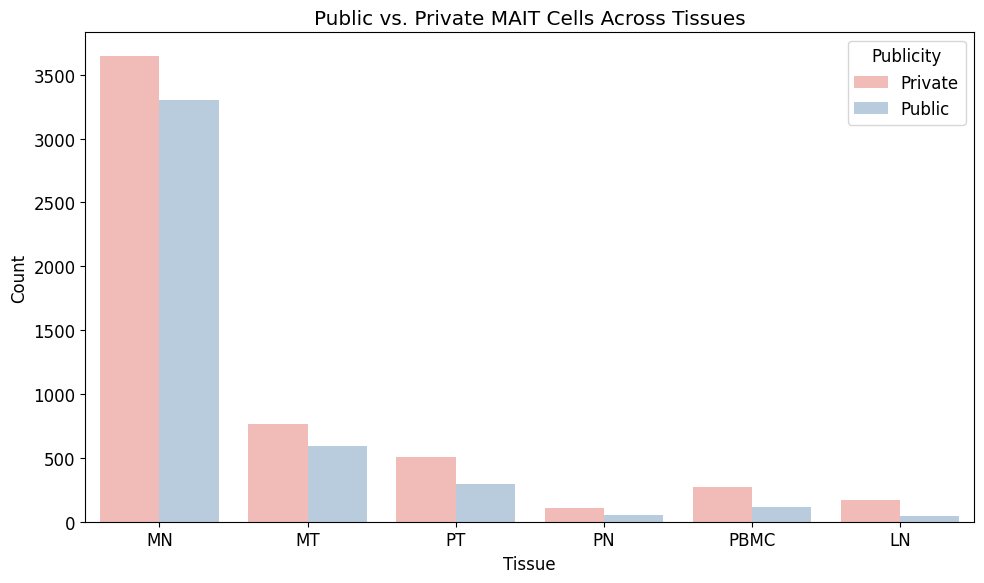

In [31]:
# MAIT publicity across tissues
plot_count(df=MAIT_df, X='tissue', hue='publicity', title='Public vs. Private MAIT Cells Across Tissues', xlabel='Tissue', 
    legend_title='Publicity', labels=['Private', 'Public'], 
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/MAIT_publicity_across_tissues.png', 
    palette='Pastel1')

##### Percentage of MAIT Across Tisues

/tmp/ipykernel_135264/3252088565.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')


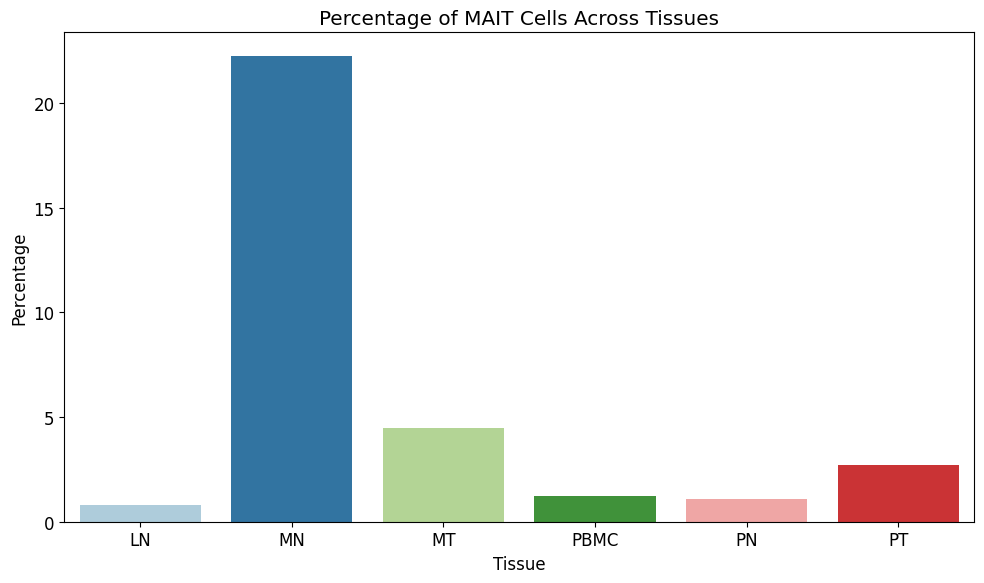

In [32]:
# calculate the percentage of MAIT cells across tissues
MAIT_tissue_count = MAIT_df.groupby('tissue')['barcode'].count().reset_index(name='MAIT_count')
total_tissue_count = GSE164522_data_df.groupby('tissue')['barcode'].count().reset_index(name='total_count')
MAIT_tissue_percentage = pd.merge(MAIT_tissue_count, total_tissue_count, on='tissue', how='left')
MAIT_tissue_percentage['percentage'] = (MAIT_tissue_percentage['MAIT_count'] / MAIT_tissue_percentage['total_count']) * 100

# plot percentage of MAIT cells across tissues
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10, 6))
sns.barplot(data=MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')
plt.title('Percentage of MAIT Cells Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/percentage_mait_cells_across_tissues.png', dpi=1200)
plt.show()


Public MAIT Acriss Tissues

In [33]:
# calculate the percentage of public MAIT cells across tissues
public_MAIT_df = MAIT_df[MAIT_df['publicity'] == 1]
public_MAIT_tissue_count = public_MAIT_df.groupby('tissue')['barcode'].count().reset_index(name='public_MAIT_count')
total_public_tissue_count = GSE164522_data_df[GSE164522_data_df['publicity'] == 1].groupby('tissue')['barcode'].count().reset_index(name='total_public_count')
public_MAIT_tissue_percentage = pd.merge(public_MAIT_tissue_count, total_public_tissue_count, on='tissue', how='left')
public_MAIT_tissue_percentage['percentage'] = (public_MAIT_tissue_percentage['public_MAIT_count'] / public_MAIT_tissue_percentage['total_public_count']) * 100
public_MAIT_tissue_percentage

,tissue,public_MAIT_count,total_public_count,percentage
0,LN,46,2683,1.714499
1,MN,3300,6267,52.656774
2,MT,595,3680,16.168478
3,PBMC,116,3647,3.180696
4,PN,56,1503,3.725882
5,PT,295,3246,9.088108


/tmp/ipykernel_135264/3330150098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=public_MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')


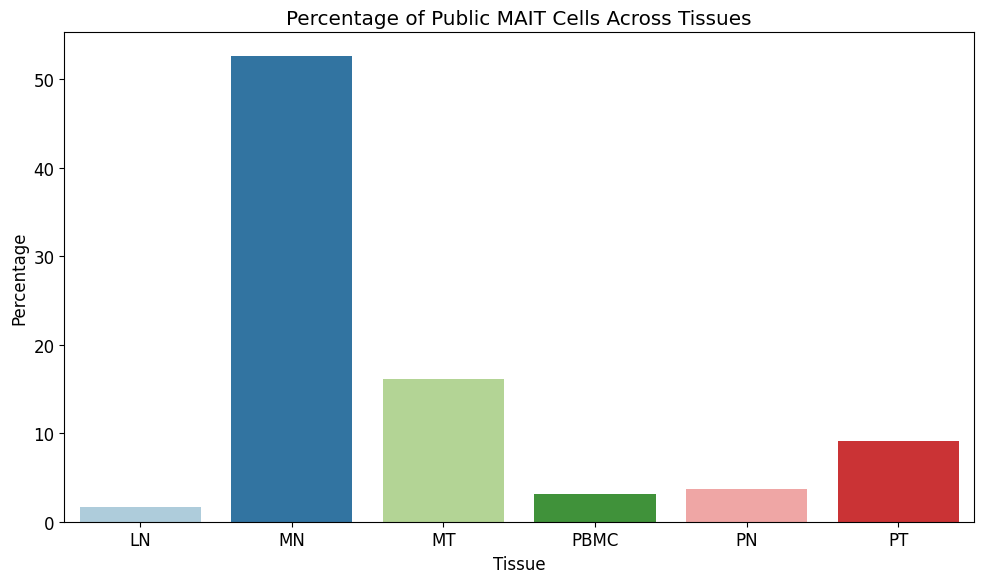

In [34]:
# plot percentage of public MAIT cells across tissues
plt.figure(figsize=(10, 6))
sns.barplot(data=public_MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')
plt.title('Percentage of Public MAIT Cells Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/percentage_public_mait_cells_across_tissues.png')
plt.show()

In [35]:
# calculate the percentage of private MAIT cells across tissues out of the total MAIT cells
public_MAIT_df = MAIT_df[MAIT_df['publicity'] == 1]
public_MAIT_tissue_count = public_MAIT_df.groupby('tissue')['barcode'].count().reset_index(name='private_MAIT_count')
total_MAIT_tissue_count = MAIT_df.groupby('tissue')['barcode'].count().reset_index(name='total_MAIT_count')
public_MAIT_tissue_percentage = pd.merge(public_MAIT_tissue_count, total_MAIT_tissue_count, on='tissue', how='left')
public_MAIT_tissue_percentage['percentage'] = (public_MAIT_tissue_percentage['private_MAIT_count'] / public_MAIT_tissue_percentage['total_MAIT_count']) * 100
public_MAIT_tissue_percentage

,tissue,private_MAIT_count,total_MAIT_count,percentage
0,LN,46,214,21.495327
1,MN,3300,6950,47.482014
2,MT,595,1364,43.621701
3,PBMC,116,388,29.896907
4,PN,56,162,34.567901
5,PT,295,800,36.875000


/tmp/ipykernel_128944/3591869175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=public_MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')


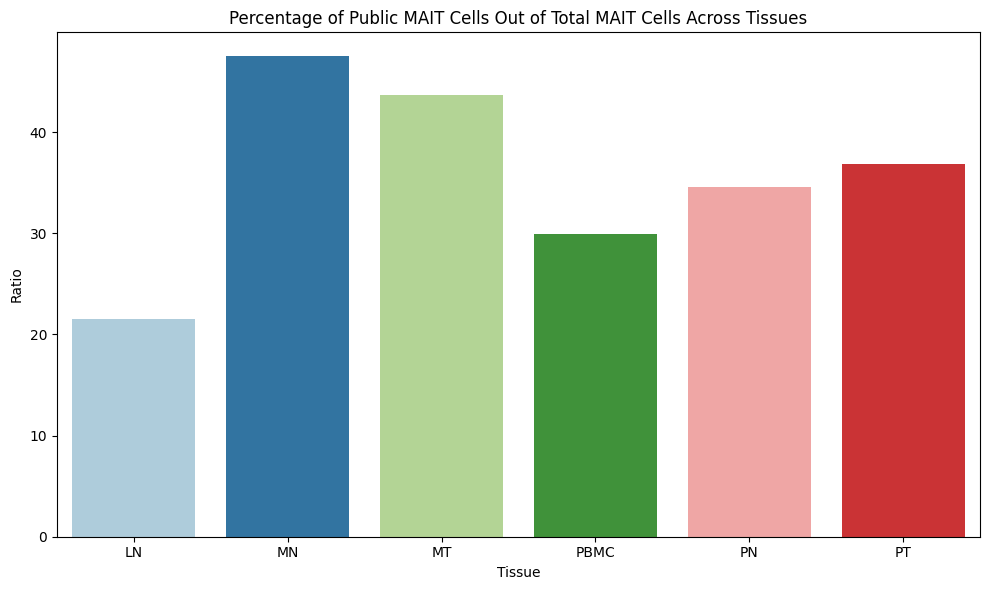

In [113]:
# plot ratio of public vs. private MAIT cells across tissues
plt.figure(figsize=(10, 6))
sns.barplot(data=public_MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')
plt.title('Percentage of Public MAIT Cells Out of Total MAIT Cells Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('Ratio')
plt.tight_layout()
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/ratio_public_private_mait_cells_across_tissues.png')
plt.show()


#### Tissues across Patients

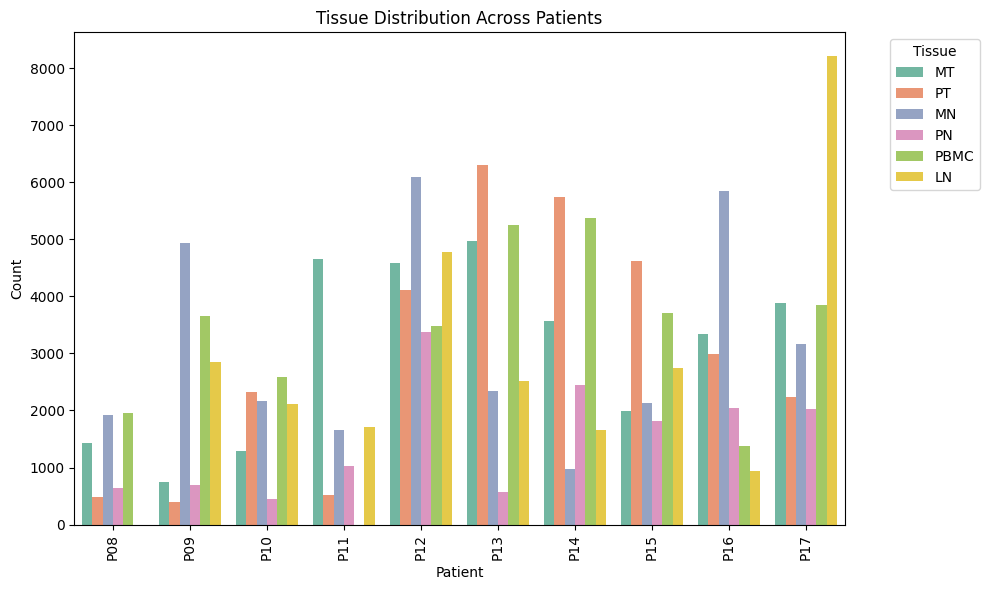

In [29]:
# Tissue distribution across patients
plot_count(df=GSE164522_data_df, X='patient', hue='tissue', title='Tissue Distribution Across Patients', xlabel='Patient', 
    legend_title='Tissue', rotation=90,
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/tissue_distribution_across_patients.png', 
    palette='Set2')

#### Unique Sequences Per Tissue

In [30]:
# Dictionary to hold unique sequences for each tissue
unique_sequences = {}

# List of all tissue types
tissues = ['PBMC', 'MN', 'MT', 'PT', 'LN', 'PN']

# Filter data and find unique sequences for each tissue, checking against all others
for current_tissue in tissues:
    # Filter data for the current tissue
    current_data = GSE164522_data_df[GSE164522_data_df['tissue'] == current_tissue]
    
    # Get cdr3_aa sequences for current tissue
    current_sequences = current_data['cdr3_aa']
    
    # Filter out sequences that appear in any other tissue
    other_tissues_data = GSE164522_data_df[GSE164522_data_df['tissue'] != current_tissue]
    other_tissues_sequences = other_tissues_data['cdr3_aa']
    
    # Identify sequences that are only found in the current tissue
    unique_to_current = current_sequences[~current_sequences.isin(other_tissues_sequences)].drop_duplicates()
    
    # Store unique sequences in the dictionary
    unique_sequences[current_tissue] = unique_to_current

In [31]:
# Print the count of unique sequences per tissue
for tissue, sequences in unique_sequences.items():
    print(f"{tissue} has {len(sequences)} unique sequences.")

PBMC has 19156 unique sequences.
MN has 8643 unique sequences.
MT has 14027 unique sequences.
PT has 13457 unique sequences.
LN has 21591 unique sequences.
PN has 8749 unique sequences.


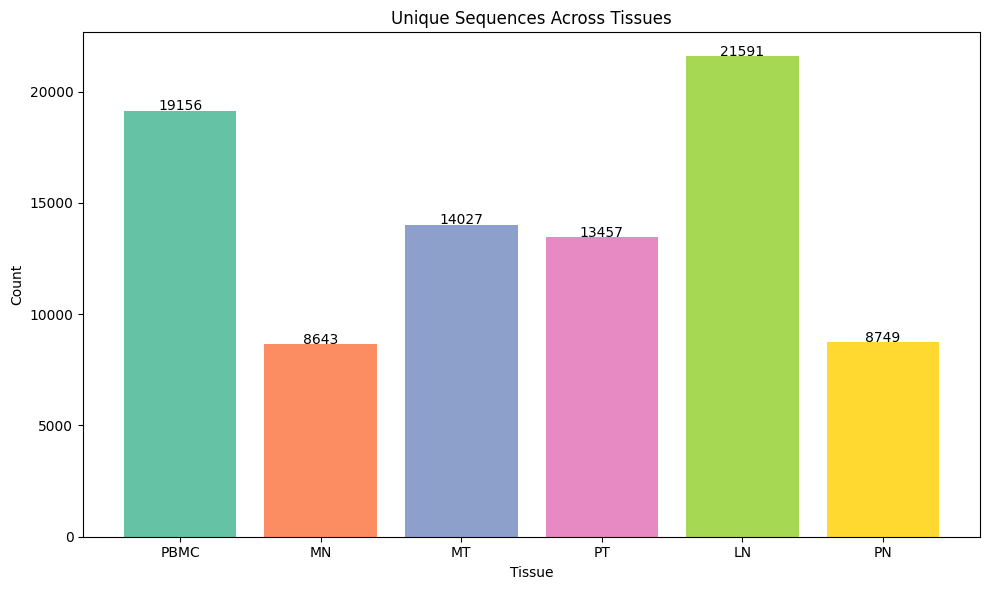

In [32]:
# plot from unique_sequences the number of unique sequences
plt.figure(figsize=(10, 6))
plt.bar(unique_sequences.keys(), [len(seq) for seq in unique_sequences.values()], color=sns.color_palette("Set2"))
# label the bars with the number of unique sequences
for i, v in enumerate([len(seq) for seq in unique_sequences.values()]):
    plt.text(i, v + 10, str(v), ha='center')
plt.title('Unique Sequences Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/unique_sequences_across_tissues.png')
plt.show()

In [33]:
tissue = 'PBMC'
# make unique_sequences['LN'] a list
unique_sequences[tissue] = unique_sequences[tissue].tolist()
list_of_unique_sequences_LN = unique_sequences[tissue]
list_of_unique_sequences_LN = pd.DataFrame(list_of_unique_sequences_LN, columns=['unique_sequences'])
file_name = '/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/unique_sequences_' + tissue + '.csv'
list_of_unique_sequences_LN.to_csv(file_name, index=False)

#### Public MN Seuqence (MAIT) Analysis

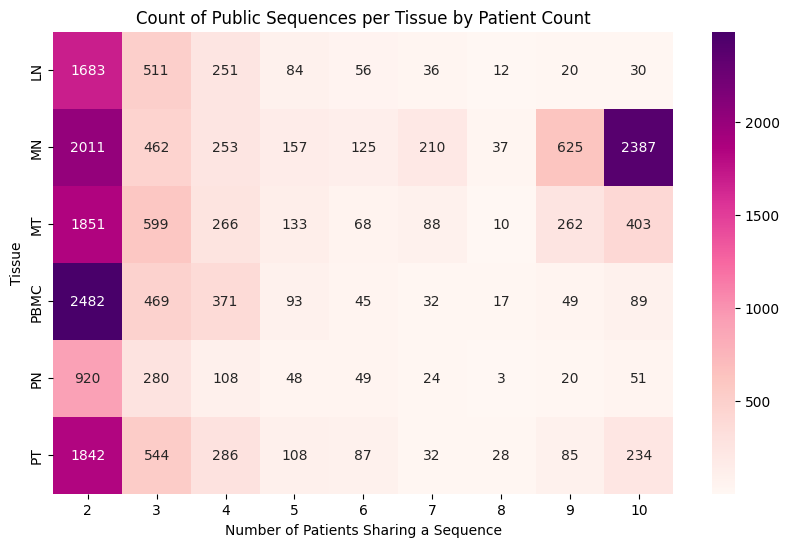

In [18]:
# Filter out private sequences
public_df = GSE164522_data_df[GSE164522_data_df['publicity'] == 1]

patient_sequence_count = public_df.groupby('tissue')['patient_count'].value_counts().reset_index(name='sequence_count')

# Correcting the pivot call with keyword arguments
heatmap_data = patient_sequence_count.pivot(index="tissue", columns="patient_count", values="sequence_count")

# Now, plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="RdPu", fmt="g")
plt.title('Count of Public Sequences per Tissue by Patient Count')
plt.xlabel('Number of Patients Sharing a Sequence')
plt.ylabel('Tissue')
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/heatmap_publicity_count_across_tissues.png')
plt.show()

In [ ]:
# Calculate the number of unique sequences per tissue and patient count
unique_patient_sequence_count = public_df.groupby(['tissue', 'patient_count'])['cdr3_aa'].nunique().reset_index(name='unique_sequence_count')

# Pivot the data for heatmap visualization
unique_heatmap_data = unique_patient_sequence_count.pivot(index='tissue', columns='patient_count', values='unique_sequence_count')

# Plotting the heatmap
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10, 6))
sns.heatmap(unique_heatmap_data, annot=True, cmap="RdPu", fmt="g")
plt.title('Count of Unique Public Sequences per Tissue by Patient Count')
plt.xlabel('Number of Patients Sharing a Sequence')
plt.ylabel('Tissue')
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/heatmap_unique_publicity_count_across_tissues.png', dip=1200)
plt.show()


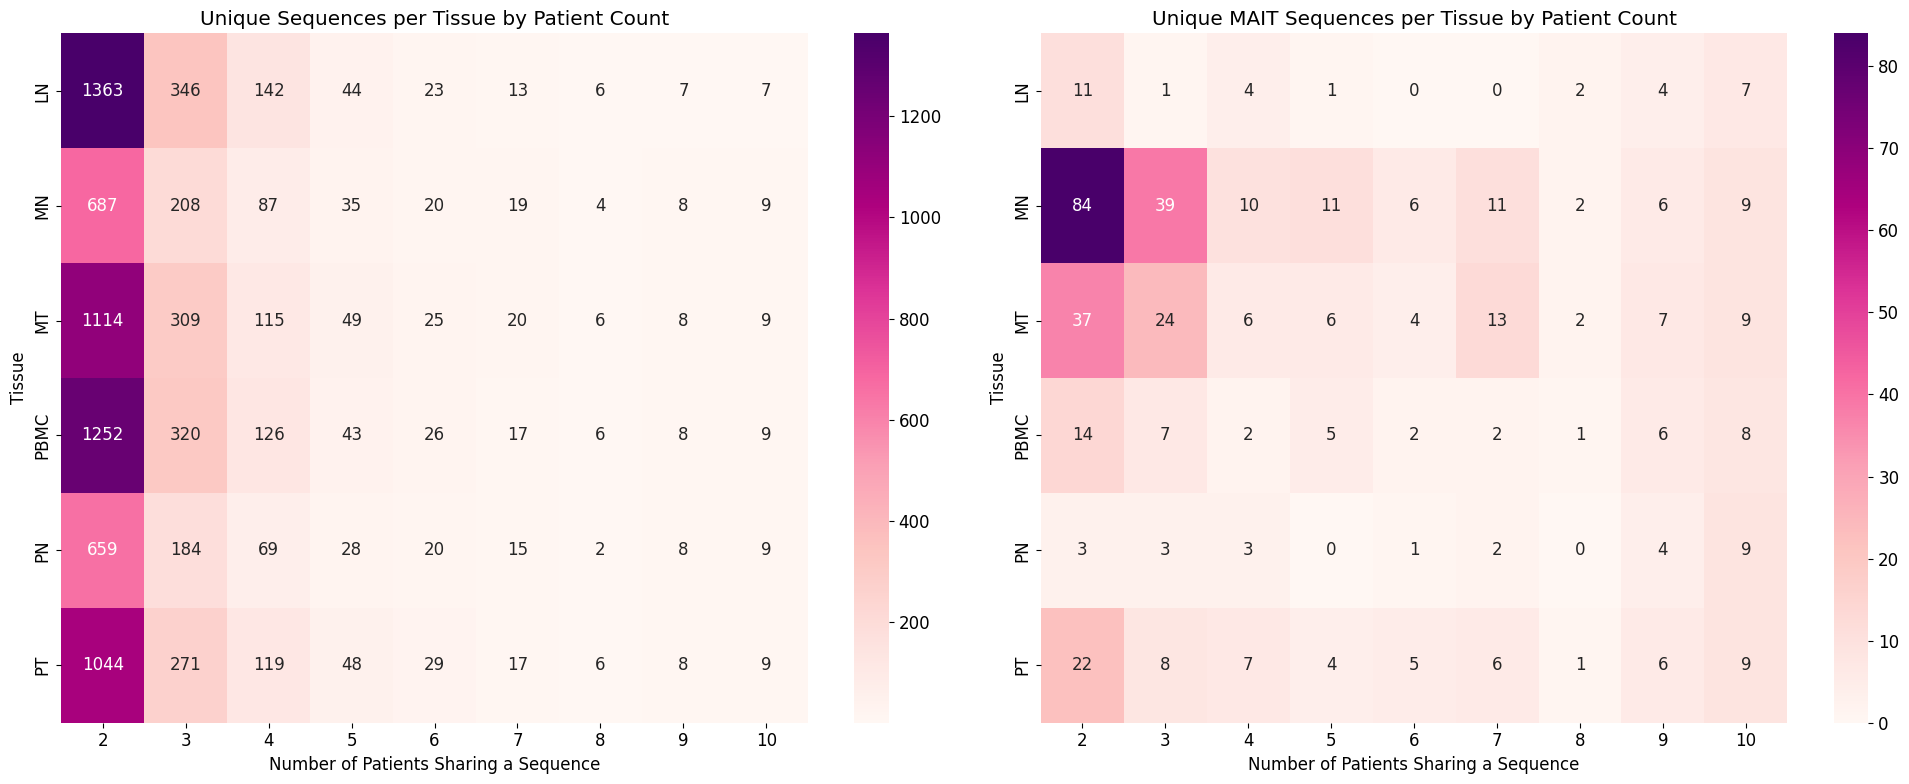

In [20]:
# Filter for MAIT cells only
mait_df = public_df[public_df['MAIT_cell'] == 'MAIT_cell']

# Calculate the number of unique MAIT sequences per tissue and patient count
mait_unique_patient_sequence_count = mait_df.groupby(['tissue', 'patient_count'])['cdr3_aa'].nunique().reset_index(name='unique_mait_sequence_count')
# Pivot the MAIT data
mait_heatmap_data = mait_unique_patient_sequence_count.pivot(index='tissue', columns='patient_count', values='unique_mait_sequence_count')

# Plotting the heatmap
# Ensure the pivot tables are filled with zeros instead of NaN where there are no data
unique_heatmap_data = unique_heatmap_data.fillna(0)
mait_heatmap_data = mait_heatmap_data.fillna(0)

# Plotting both heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(unique_heatmap_data, annot=True, cmap="RdPu", fmt=".0f", ax=axes[0])
axes[0].set_title('Unique Sequences per Tissue by Patient Count')
axes[0].set_xlabel('Number of Patients Sharing a Sequence')
axes[0].set_ylabel('Tissue')

sns.heatmap(mait_heatmap_data, annot=True, cmap="RdPu", fmt=".0f", ax=axes[1])
axes[1].set_title('Unique MAIT Sequences per Tissue by Patient Count')
axes[1].set_xlabel('Number of Patients Sharing a Sequence')
axes[1].set_ylabel('Tissue')

plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/heatmap_unique_publicity_count_across_tissues_with_MAIT_comparison.png')
plt.tight_layout()
plt.show()


##### Retrieve MN most Public

In [ ]:
# Filter for public sequences in 'MN' tissue
mn_public_sequences = public_df[(public_df['tissue'] == 'MN')]

# Now filter for those appearing in exactly 10 patients
mn_sequences_in_10_patients = mn_public_sequences[mn_public_sequences['patient_count'] == 10]

# Get the actual sequences
actual_sequences = mn_sequences_in_10_patients['cdr3_aa']

# Get the actual unique sequences
mn_unique_sequences_in_10_patients = actual_sequences.unique()

In [22]:
mn_unique_sequences_in_10_patients

array(['CAVVDSNYQLIW', 'CAVTDSNYQLIW', 'CAAMDSNYQLIW', 'CAVMDSNYQLIW',
       'CAVSDSNYQLIW', 'CAVMDSSYKLIF', 'CAVLDSNYQLIW', 'CAVKDSNYQLIW',
       'CAVRDSNYQLIW'], dtype=object)

In [23]:
mn_sequences_in_10_patients[mn_sequences_in_10_patients['v_gene'] == 'TRAV1-1']

,Unnamed: 0,barcode,patient,cdr3_aa,cdr3_nt,v_gene,j_gene,tissue,publicity,patient_count,chain,MAIT_cell
76,76,TCATTACTCACCTCGT-1,P08,CAVVDSNYQLIW,TGTGCTGTCGTGGATAGCAACTATCAGTTAATCTGG,TRAV1-1,TRAJ33,MN,1,10,TRA,non-MAIT_cell
77,77,AGCTCTCGTCAATACC-1,P08,CAVTDSNYQLIW,TGTGCTGTGACGGATAGCAACTATCAGTTAATCTGG,TRAV1-1,TRAJ33,MN,1,10,TRA,non-MAIT_cell
9933,9933,ACTATCTCAGTAACGG-1,P10,CAVMDSSYKLIF,TGCGCTGTGATGGATAGCAGCTATAAATTGATCTTC,TRAV1-1,TRAJ12,MN,1,10,TRA,non-MAIT_cell
54258,54260,GACTACACACACTGCG-1,P15,CAVMDSNYQLIW,TGTGCTGTCATGGATAGCAACTATCAGTTAATCTGG,TRAV1-1,TRAJ33,MN,1,10,TRA,non-MAIT_cell


In [24]:
collections.Counter(mn_sequences_in_10_patients['v_gene'])

Counter({'TRAV1-2': 2383, 'TRAV1-1': 4})

In [25]:
collections.Counter(mn_sequences_in_10_patients['j_gene'])

Counter({'TRAJ33': 2304, 'TRAJ12': 83})

Occurance in other tissues

In [26]:
# Filter for occurrences of these sequences in other tissues
other_tissues = public_df[(public_df['tissue'] != 'MN') & (public_df['cdr3_aa'].isin(mn_unique_sequences_in_10_patients))]

# Get tissues where these sequences appear
sequence_presence_in_other_tissues = other_tissues.groupby('cdr3_aa')['tissue'].unique().reset_index()
sequence_presence_in_other_tissues['tissue_count'] = sequence_presence_in_other_tissues['tissue'].apply(len)
sequence_presence_in_other_tissues

,cdr3_aa,tissue,tissue_count
0,CAAMDSNYQLIW,"[MT, PBMC, PT, LN, PN]",5
1,CAVKDSNYQLIW,"[LN, MT, PN, PBMC, PT]",5
2,CAVLDSNYQLIW,"[MT, PBMC, PT, LN, PN]",5
3,CAVMDSNYQLIW,"[MT, PN, PT, PBMC, LN]",5
4,CAVMDSSYKLIF,"[MT, PT, PN, PBMC, LN]",5
5,CAVRDSNYQLIW,"[MT, PT, PBMC, PN, LN]",5
6,CAVSDSNYQLIW,"[PT, MT, PN, PBMC]",4
7,CAVTDSNYQLIW,"[MT, PT, LN, PN, PBMC]",5
8,CAVVDSNYQLIW,"[MT, PBMC, PT, PN]",4


In [27]:
# Filter for occurrences of these sequences across all tissues
sequences_across_tissues = public_df[public_df['cdr3_aa'].isin(mn_unique_sequences_in_10_patients)]

# Group by sequence and tissue, then count occurrences
sequence_tissue_counts = sequences_across_tissues.groupby(['cdr3_aa', 'tissue']).size().reset_index(name='count')
# Pivot table for better visualization
pivot_sequence_tissue_counts = sequence_tissue_counts.pivot(index='cdr3_aa', columns='tissue', values='count').fillna(0)
print(pivot_sequence_tissue_counts)


tissue         LN     MN     MT  PBMC    PN    PT
cdr3_aa                                          
CAAMDSNYQLIW  4.0  333.0   31.0   2.0   1.0   8.0
CAVKDSNYQLIW  7.0  229.0   59.0  18.0  11.0  27.0
CAVLDSNYQLIW  5.0  313.0   48.0   6.0   4.0  27.0
CAVMDSNYQLIW  6.0  581.0  110.0  29.0  14.0  64.0
CAVMDSSYKLIF  1.0   83.0   19.0   6.0   2.0  28.0
CAVRDSNYQLIW  5.0  430.0   79.0  18.0   9.0  43.0
CAVSDSNYQLIW  0.0   89.0   12.0   1.0   1.0   9.0
CAVTDSNYQLIW  2.0  202.0   30.0   2.0   3.0  13.0
CAVVDSNYQLIW  0.0  127.0   15.0   7.0   6.0  15.0


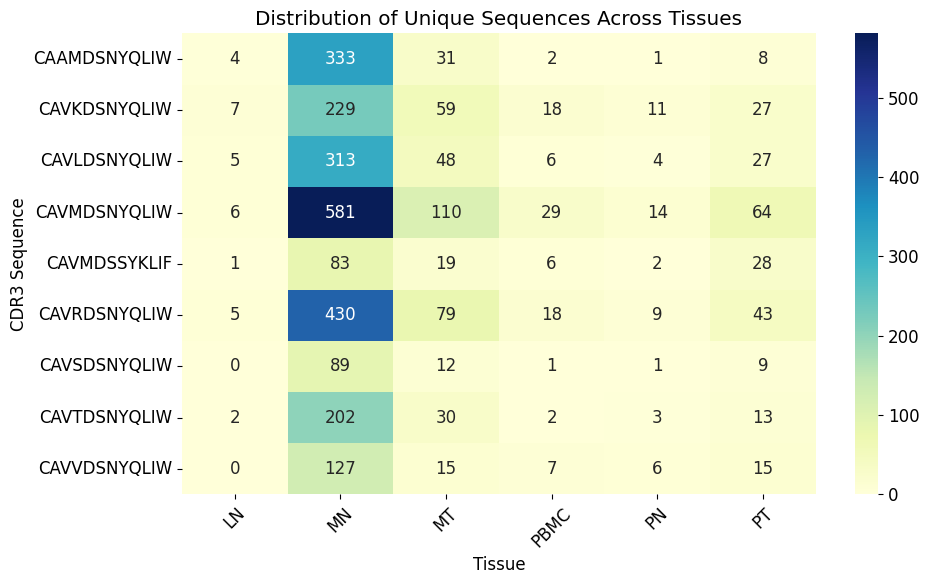

In [47]:
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_sequence_tissue_counts, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Distribution of Unique Sequences Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('CDR3 Sequence')
plt.xticks(rotation=45)  # Rotate tissue names for better visibility
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/heatmap_MN_top_unique_sequences_across_tissues.png', dpi=1200)
plt.show()


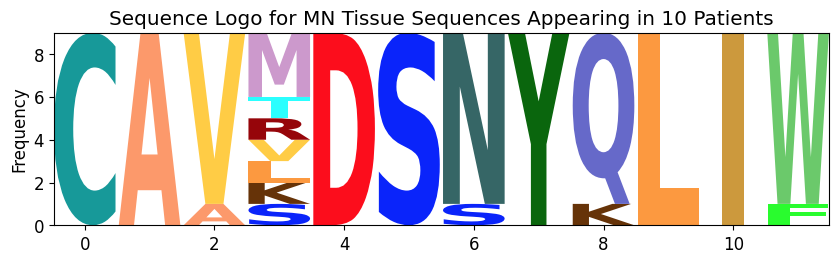

In [32]:
crm = logomaker.alignment_to_matrix(sequences=mn_unique_sequences_in_10_patients, to_type='counts', characters_to_ignore='X-')

# Create the logo
logo = logomaker.Logo(crm, color_scheme='skylign_protein')
logo.ax.set_ylabel("Frequency")
logo.ax.set_title("Sequence Logo for MN Tissue Sequences Appearing in 10 Patients")
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/sequence_logo_MN_top_unique_sequences.png', dpi=800)
plt.show()

##### MAIT Sequence Overlap in in MN/MT Tissues

In [33]:
# Filter MAIT sequences for MN and MT tissues
mn_mait_sequences = public_df[(public_df['tissue'] == 'MN') & (public_df['MAIT_cell'] == 'MAIT_cell')]['cdr3_aa'].unique()
mt_mait_sequences = public_df[(public_df['tissue'] == 'MT') & (public_df['MAIT_cell'] == 'MAIT_cell')]['cdr3_aa'].unique()

# Convert sequences to sets
mn_mait_set = set(mn_mait_sequences)
mt_mait_set = set(mt_mait_sequences)

# Find unique and shared sequences
unique_mait_to_mn = mn_mait_set - mt_mait_set
unique_mait_to_mt = mt_mait_set - mn_mait_set
shared_mt_mn_mait_sequences = mn_mait_set & mt_mait_set

# Output the results
print(f"Unique to MN: {len(unique_mait_to_mn)} unique sequences")
print(f"Unique to MT: {len(unique_mait_to_mt)} uniqiue sequences")
print(f"Shared sequences: {len(shared_mt_mn_mait_sequences)} unique sequences")

Unique to MN: 100 unique sequences
Unique to MT: 30 uniqiue sequences
Shared sequences: 78 unique sequences


In [34]:
print(shared_mt_mn_mait_sequences)

{'CAPLDSNYQLIW', 'CASSEDRGPDEQYF', 'CAVIDSNYQLIW', 'CAVTDSSYKLIF', 'CAVEDSSYKLIF', 'CAAVDSNYQLIW', 'CAVWDSNYQLIW', 'CASSDSSTDTQYF', 'CAVPDSNYQLIW', 'CAVVDSNYQLIW', 'CAAMDSSYKLIF', 'CAVRDNDYKLSF', 'CAVRDSDYKLSF', 'CAVRAGDYKLSF', 'CAVLDSNYQLIW', 'CAVSSNDYKLSF', 'CAVRDGDYKLSF', 'CAVRNSNYQLIW', 'CALLDSNYQLIW', 'CAVMDSNYQLIW', 'CAVIGSNYQLIW', 'CASTDSNYQLIW', 'CAVVDSSYKLIF', 'CASSELAGGEETQYF', 'CAGMDSSYKLIF', 'CAGLDSNYQLIW', 'CAAQDSNYQLIW', 'CVFMDSNYQLIW', 'CAYMDSNYQLIW', 'CAVEDSNYQLIW', 'CASSELAGSYNEQFF', 'CASVDSNYQLIW', 'CAAEDSNYQLIW', 'CAALDSNYQLIW', 'CAVRDSNYQLIW', 'CAVADSNYQLIW', 'CAGVDSNYQLIW', 'CAVYDSNYQLIW', 'CAVTDSNYQLIW', 'CASSDSSGANVLTF', 'CASMDSNYQLIW', 'CAVRDEDYKLSF', 'CAVLNSNYQLIW', 'CAVQDSNYQLIW', 'CAVGDSNYQLIW', 'CASSDSNYQLIW', 'CASSDSSGGTDTQYF', 'CVPMDSNYQLIW', 'CSARGLADYEQYF', 'CASSEGTGDTGELFF', 'CASKDSNYQLIW', 'CACMDSNYQLIW', 'CASSEGSNQPQHF', 'CAVRDRNYQLIW', 'CASSDSAGGPDTQYF', 'CAIMDSNYQLIW', 'CAPMDSNYQLIW', 'CASSGTSGSTDTQYF', 'CAVRDQDYKLSF', 'CAVLDSSYKLIF', 'CAVRDRDYKLSF'

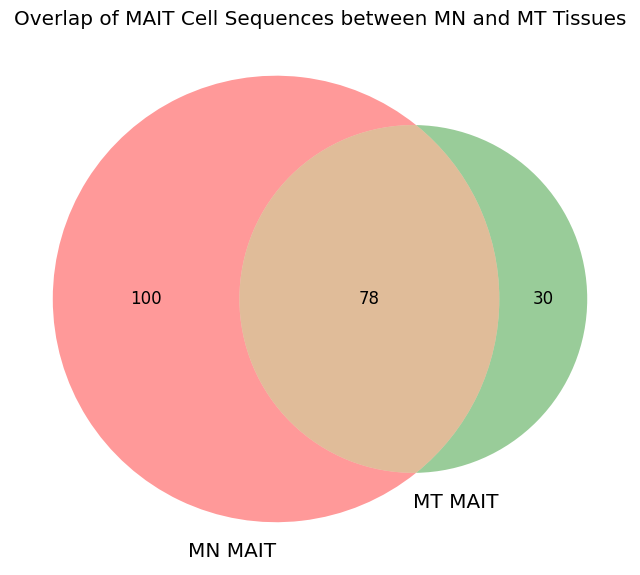

In [56]:
# Plot Venn diagram
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(8, 8))
venn2([mn_mait_set, mt_mait_set], set_labels=('MN MAIT', 'MT MAIT'))
plt.title('Overlap of MAIT Cell Sequences between MN and MT Tissues')
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/venn_mait_sequences_mn_mt.png', dpi=1200)
plt.show()

Look at the shared sequences in the other tissues

In [35]:
# Convert shared sequences back to a list for filtering
shared_mt_mn_sequence_list = list(shared_mt_mn_mait_sequences)

# Filter original DataFrame for shared sequences in all tissues except MN and MT
other_tissues_appearance = public_df[
    (public_df['cdr3_aa'].isin(shared_mt_mn_sequence_list)) & 
    (~public_df['tissue'].isin(['MN', 'MT']))
]

# Get unique tissues where these sequences appear
shared_sequences_in_other_tissues = other_tissues_appearance.groupby('cdr3_aa')['tissue'].unique().reset_index()
print(shared_sequences_in_other_tissues)

            cdr3_aa              tissue
0      CAALDSNYQLIW  [PT, PN, PBMC, LN]
1      CAAMDSNYQLIW  [PBMC, PT, LN, PN]
2      CAAMDSSYKLIF                [PN]
3      CAAQDSNYQLIW                [PT]
4      CAASDSNYQLIW      [PT, PBMC, LN]
5      CAATDSNYQLIW          [PBMC, PT]
6      CAAVDSNYQLIW      [PBMC, PT, LN]
7      CACMDSNYQLIW          [PT, PBMC]
8      CAEMDSNYQLIW                [PT]
9      CAGLDSNYQLIW      [PT, PBMC, LN]
10     CAGMDSNYQLIW      [PN, PT, PBMC]
11     CAGMDSSYKLIF                [LN]
12     CAGVDSNYQLIW                [PN]
13     CALMDSNYQLIW      [PN, PT, PBMC]
14     CALRDSNYQLIW          [PBMC, PT]
15     CAPLDSNYQLIW                [PN]
16     CAPMDSNYQLIW  [PT, PN, PBMC, LN]
17     CAPSDSNYQLIW                [PT]
18     CASKDSNYQLIW                [PT]
19     CASLDSNYQLIW                [PN]
20     CASMDSNYQLIW  [PBMC, PT, LN, PN]
21   CASSDSSGANVLTF                [PT]
22    CASSEGSNQPQHF      [PBMC, PN, PT]
23  CASSELAGSYNEQFF                [PT]


In [36]:
len(shared_sequences_in_other_tissues)

57

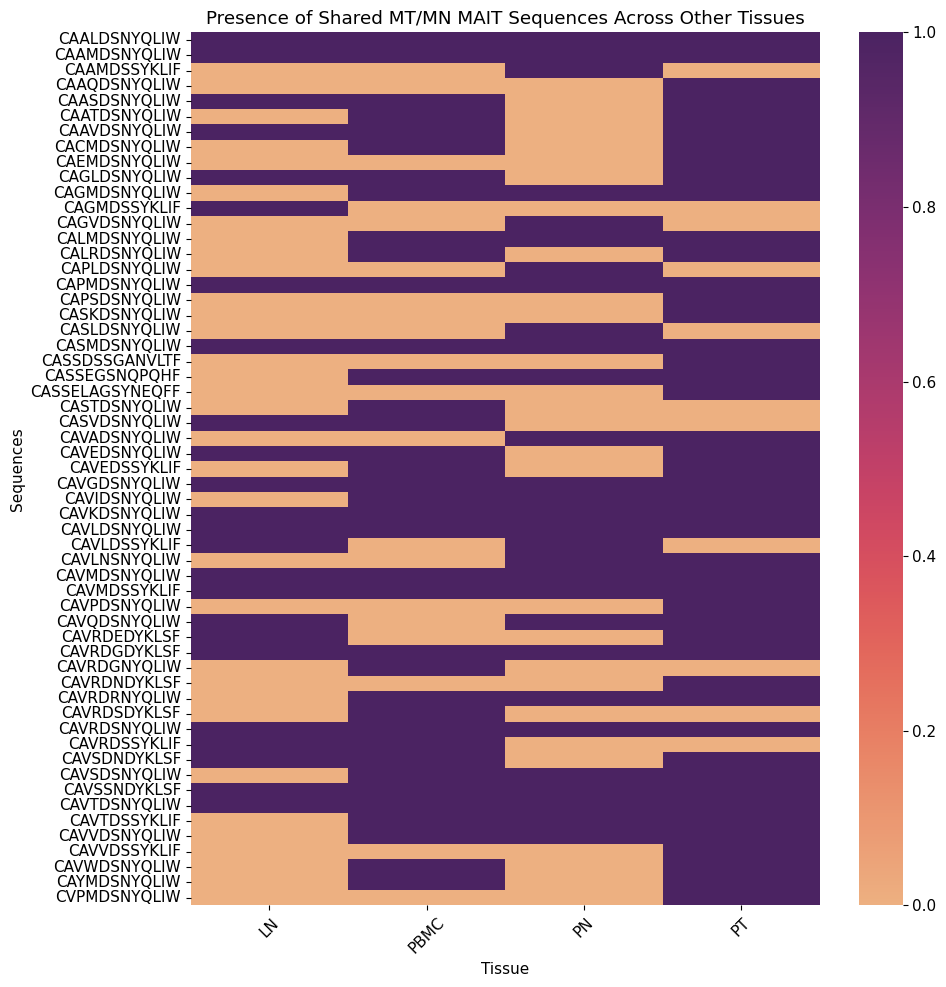

In [48]:
# Expand the 'tissue' list into a binary format for each tissue
tissue_presence = pd.get_dummies(shared_sequences_in_other_tissues['tissue'].explode()).groupby(level=0).max()

# Plot the heatmap
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(10, 10))
sns.heatmap(tissue_presence, cmap='flare', cbar=True, yticklabels=shared_sequences_in_other_tissues['cdr3_aa'])
plt.title('Presence of Shared MT/MN MAIT Sequences Across Other Tissues')
plt.xlabel('Tissue')
plt.ylabel('Sequences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/heatmap_shared_mait_sequences_across_tissues.png', dpi=800)
plt.show()


In [131]:
# Filter for occurrences of these sequences across all tissues
shared_mn_mt_df = public_df[public_df['cdr3_aa'].isin(shared_mt_mn_sequence_list)]

# Group by sequence and tissue, then count occurrences
shared_mn_mt_df = shared_mn_mt_df.groupby(['cdr3_aa', 'tissue']).size().reset_index(name='count')

# Pivot table for better visualization
pivot_shared_mn_mt_df = shared_mn_mt_df.pivot(index='cdr3_aa', columns='tissue', values='count').fillna(0)
print(pivot_shared_mn_mt_df)

tissue          LN     MN    MT  PBMC   PN    PT
cdr3_aa                                         
CAAEDSNYQLIW   0.0    7.0   2.0   0.0  0.0   0.0
CAALDSNYQLIW   1.0   77.0  20.0   8.0  5.0  25.0
CAAMDSNYQLIW   4.0  333.0  31.0   2.0  1.0   8.0
CAAMDSSYKLIF   0.0    8.0   1.0   0.0  1.0   0.0
CAAQDSNYQLIW   0.0    8.0   2.0   0.0  0.0   3.0
...            ...    ...   ...   ...  ...   ...
CAYMDSNYQLIW   0.0    8.0   3.0   1.0  0.0   1.0
CSARGLADYEQYF  0.0    4.0   1.0   0.0  0.0   0.0
CVFMDSNYQLIW   0.0    2.0   1.0   0.0  0.0   0.0
CVLMDSNYQLIW   0.0    3.0   1.0   0.0  0.0   0.0
CVPMDSNYQLIW   0.0   10.0   1.0   0.0  0.0   1.0

[78 rows x 6 columns]


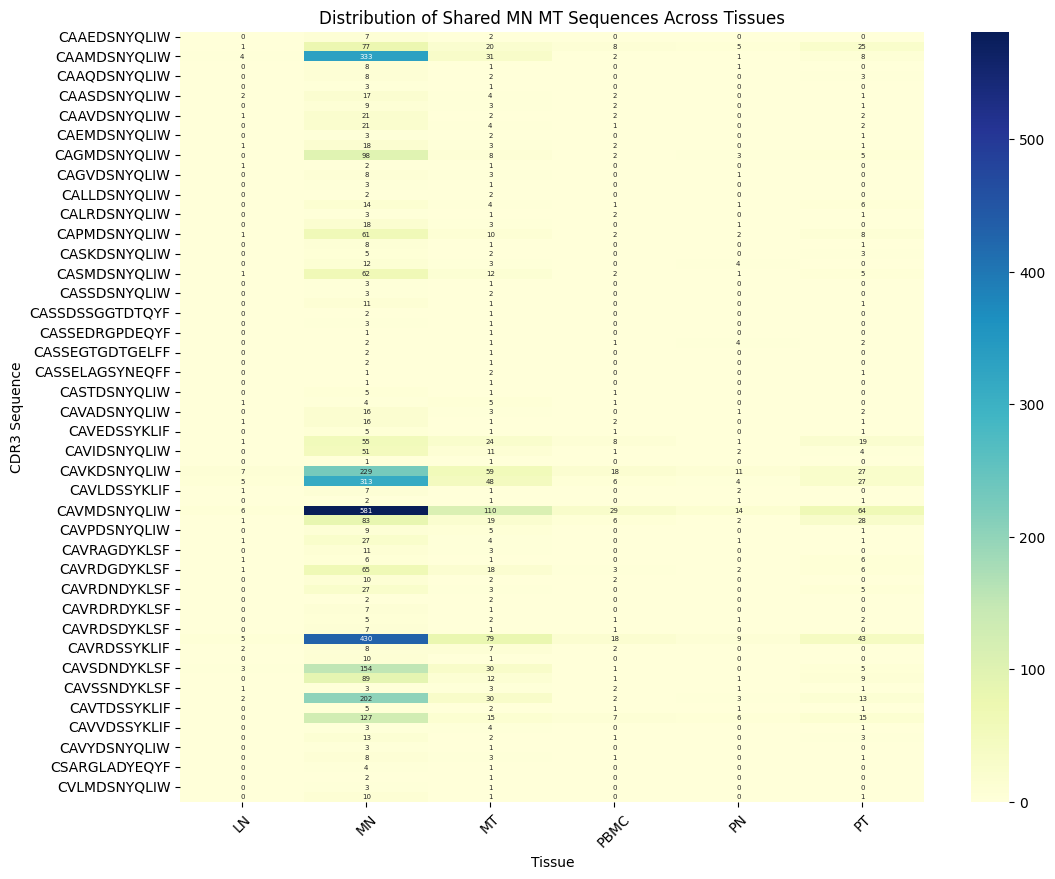

In [132]:
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_shared_mn_mt_df, annot=True, cmap="YlGnBu", fmt=".0f", annot_kws={"size": 5})   
plt.title('Distribution of Shared MN MT Sequences Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('CDR3 Sequence')
plt.xticks(rotation=45)  # Rotate tissue names for better visibility
plt.yticks(rotation=0)
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/plots/heatmap_MN_MT_shared_sequences_across_tissues.png')
plt.show()

#### Extract shared sequence embeddings

In [133]:
general_embedding_data = pd.read_pickle('~/CODON_CVC/single_cell_data/GSE164522_colon_data/GSE164522_all_labels_embeddings.pkl')
general_embedding_data

,cdr3_nt,0,1,2,3,4,5,6,7,8,...,764,765,766,767,barcode,patient,cdr3_aa,v_gene,j_gene,label
0,TGCGCCGCTCGAGATGGCCAGAAGCTGCTCTTT,-0.360660,-0.720405,0.655013,0.650397,1.094708,-0.210284,-0.431791,-0.151066,1.054431,...,-0.392721,-0.440050,-0.343047,0.977851,CAAGAAATCAGGCAAG-1,P08,CAARDGQKLLF,TRAV1-1,TRAJ16,MT
1,TGCGCTCCCAGAGACGCAGGCAACATGCTCACCTTT,-1.039346,-0.719567,0.788175,0.352848,1.151898,0.632654,-0.560385,-0.401400,1.261408,...,-0.114769,-0.014682,0.010661,2.120157,CCGTACTAGAGGTACC-1,P08,CAPRDAGNMLTF,TRAV1-1,TRAJ39,PT
2,TGCGCTCCGTGGAGGGCAAACAACCTCTTCTTT,-0.821220,-0.364737,0.995029,0.044243,-0.573092,-0.466179,-0.463114,-0.519523,0.703778,...,-0.607139,-0.173132,-0.270669,1.594793,CAGGTGCGTATTAGCC-1,P08,CAPWRANNLFF,TRAV1-1,TRAJ36,MN
3,TGCGCTGAGAACGACTACAAGCTCAGCTTT,0.117825,-0.252610,0.491493,-0.832712,-0.277819,0.850477,-1.089799,0.482932,0.229458,...,-0.524894,1.340586,-0.367504,0.583155,TGACGGCTCGTCGTTC-1,P08,CAENDYKLSF,TRAV1-1,TRAJ20,MT
4,TGCGCTGGGGGCTATAACCAGGGAGGAAAGCTTATCTTC,0.497898,-0.742942,0.541384,-0.669612,0.524456,1.171828,-0.651872,-0.090650,-0.550405,...,0.294472,-0.853184,0.196045,0.460570,CGGACGTTCGCTTAGA-1,P08,CAGGYNQGGKLIF,TRAV1-1,TRAJ23,PN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165289,TGCAGCGTTGAGGGTGAGCGGGAGTTTTCAGATACGCAGTATTTT,1.932276,0.396984,0.791852,-0.150947,1.160648,1.444649,-1.108061,0.503062,-0.183953,...,-0.573496,0.190269,0.994297,-0.460409,GTTCGGGCATTCTCAT-1,P17,CSVEGEREFSDTQYF,TRBV29-1,TRBJ2-3,MT
165290,TGTGCCAGCAGTTATGATAGTGGACGCGAGCAGTTCTTC,0.979405,0.059981,1.440431,0.917567,0.899945,0.785702,-1.150574,-0.563933,0.794126,...,0.319075,-1.103644,0.333144,0.298279,ACGATACCAAGTACCT-1,P17,CASSYDSGREQFF,TRBV5-4,TRBJ2-1,LN
165291,TGTGCCAGCAGCGTAGGGACTAGCGGGGGGGCTGATGAGCAGTTCTTC,1.531754,-0.328141,0.714293,-0.131604,0.278758,1.512395,-0.132664,-0.173171,-0.739775,...,0.602942,-0.847813,0.143782,0.507892,TGAGAGGAGCGAAGGG-1,P17,CASSVGTSGGADEQFF,TRBV9,TRBJ2-1,LN
165292,TGTGCCAGCAGCTTGACTAGCGGGAGTTCACAAGAGACCCAGTACTTC,1.643037,0.326698,-0.191690,0.195636,0.604005,2.093655,-1.380581,0.314019,0.467489,...,0.493426,-0.072765,0.435622,0.282845,GGTATTGAGGTGCAAC-1,P17,CASSLTSGSSQETQYF,TRBV5-5,TRBJ2-5,MT


In [134]:
# subset the embedding data for shared sequences in MN and MT tissues
shared_mn_mt_embedding_data = general_embedding_data[general_embedding_data['cdr3_aa'].isin(shared_mt_mn_sequence_list)]
shared_mn_mt_embedding_data

,cdr3_nt,0,1,2,3,4,5,6,7,8,...,764,765,766,767,barcode,patient,cdr3_aa,v_gene,j_gene,label
76,TGTGCTGTCGTGGATAGCAACTATCAGTTAATCTGG,1.345915,-0.302962,-0.558756,-0.280376,0.339250,0.742885,0.112574,-0.206518,0.307257,...,0.249774,-1.299932,0.760736,1.573360,TCATTACTCACCTCGT-1,P08,CAVVDSNYQLIW,TRAV1-1,TRAJ33,MN
77,TGTGCTGTGACGGATAGCAACTATCAGTTAATCTGG,1.191486,-0.834136,0.093976,-0.375774,0.224024,0.588023,0.121602,-0.395384,0.493071,...,0.054741,-1.652978,0.304404,1.630579,AGCTCTCGTCAATACC-1,P08,CAVTDSNYQLIW,TRAV1-1,TRAJ33,MN
83,TGTGCCATCATGGATAGCAACTATCAGTTAATCTGG,0.826567,-0.795580,0.506662,0.224881,0.876860,0.134650,0.559526,-0.355719,0.298300,...,0.562145,-1.700300,1.098807,0.722204,CATGACAGTTAAGACA-1,P08,CAIMDSNYQLIW,TRAV1-2,TRAJ33,MN
84,TGTGCCCCACTGGATAGCAACTATCAGTTAATCTGG,0.669260,-1.000124,-0.211206,-0.036020,0.241324,-1.017841,0.710675,-0.379667,0.204530,...,0.690944,-0.904080,1.606613,0.897339,CTCACACAGTGAACAT-1,P08,CAPLDSNYQLIW,TRAV1-2,TRAJ33,MN
85,TGTGCCCCACTGGATAGCAACTATCAGTTAATCTGG,0.669260,-1.000124,-0.211206,-0.036020,0.241324,-1.017841,0.710675,-0.379667,0.204530,...,0.690944,-0.904080,1.606613,0.897339,TTTGCGCAGGCCCGTT-1,P08,CAPLDSNYQLIW,TRAV1-2,TRAJ33,MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154182,TGTGCCAGCAGTGATTCGGCGGGAGGGCCGGATACGCAGTATTTT,0.558483,-0.035371,1.115392,0.121284,1.075795,0.184851,0.364729,-0.644525,0.998529,...,0.335549,-1.370109,0.210943,0.797896,ACATCAGAGTGAAGTT-1,P17,CASSDSAGGPDTQYF,TRBV6-1,TRBJ2-3,MN
154205,TGTGCCAGCAGTGAGGACAGGGGGCCCGACGAGCAGTACTTC,0.167447,-0.544824,0.501664,1.275363,0.454237,0.665028,-0.175898,0.202729,0.718186,...,0.652329,-0.067082,0.868427,0.408282,CGTCTACCAGTTCATG-1,P17,CASSEDRGPDEQYF,TRBV6-1,TRBJ2-7,MN
154296,TGTGCCAGCAGTGAAGGGAGCAATCAGCCCCAGCATTTT,-0.070881,-0.395642,0.336702,-0.027155,0.806407,0.270954,1.017221,-0.884542,0.629400,...,0.792360,-0.674497,0.912172,1.042703,CAGCATATCTTGTTTG-1,P17,CASSEGSNQPQHF,TRBV6-4,TRBJ1-5,MT
154297,TGTGCCAGCAGTGAAGGGAGCAATCAGCCCCAGCATTTT,-0.070881,-0.395642,0.336702,-0.027155,0.806407,0.270954,1.017221,-0.884542,0.629400,...,0.792360,-0.674497,0.912172,1.042703,CTTGGCTTCAACCAAC-1,P17,CASSEGSNQPQHF,TRBV6-4,TRBJ1-5,MN


In [135]:
shared_mn_mt_embedding_data.to_pickle('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/shared_mn_mt_embedding_data.pkl')

##### Label Unique Sequences in dataframe

In [136]:
public_MAIT_df_extended = public_MAIT_df.copy()

In [137]:
len(shared_mt_mn_sequence_list)

78

In [138]:
public_MAIT_df_extended['MN_MT_MAIT_unique'] = np.where(public_MAIT_df_extended['cdr3_aa'].isin(shared_mt_mn_sequence_list), 'Shared_MN_MT', 'Other_MAIT')
public_MAIT_df_extended['MN_MT_MAIT_unique'] = np.where(public_MAIT_df_extended['cdr3_aa'].isin(unique_mait_to_mn), 'Unique_MN', public_MAIT_df_extended['MN_MT_MAIT_unique'])
public_MAIT_df_extended['MN_MT_MAIT_unique'] = np.where(public_MAIT_df_extended['cdr3_aa'].isin(unique_mait_to_mt), 'Unique_MT', public_MAIT_df_extended['MN_MT_MAIT_unique'])
public_MAIT_df_extended

,Unnamed: 0,barcode,patient,cdr3_aa,cdr3_nt,v_gene,j_gene,tissue,publicity,patient_count,chain,MAIT_cell,MN_MT_MAIT_unique
82,82,AGTTGGTGTCGCGTGT-1,P08,CATLDSNYQLIW,TGTGCCACCTTGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,2,TRA,MAIT_cell,Unique_MN
83,83,CATGACAGTTAAGACA-1,P08,CAIMDSNYQLIW,TGTGCCATCATGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,3,TRA,MAIT_cell,Shared_MN_MT
84,84,CTCACACAGTGAACAT-1,P08,CAPLDSNYQLIW,TGTGCCCCACTGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,7,TRA,MAIT_cell,Shared_MN_MT
85,85,TTTGCGCAGGCCCGTT-1,P08,CAPLDSNYQLIW,TGTGCCCCACTGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,7,TRA,MAIT_cell,Shared_MN_MT
88,88,GAAGCAGTCAGTTAGC-1,P08,CAPMDSNYQLIW,TGTGCCCCTATGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,9,TRA,MAIT_cell,Shared_MN_MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154643,154646,ATGGGAGTCATCGCTC-1,P17,CASSDSSGTDTQYF,TGTGCCAGCAGTGACTCGTCTGGCACAGATACGCAGTATTTT,TRBV6-4,TRBJ2-3,MN,1,3,TRB,MAIT_cell,Unique_MN
154644,154647,CATATTCAGAACTCGG-1,P17,CASSDSSGTDTQYF,TGTGCCAGCAGTGACTCGTCTGGCACAGATACGCAGTATTTT,TRBV6-4,TRBJ2-3,MN,1,3,TRB,MAIT_cell,Unique_MN
154645,154648,GGTGAAGCAGTCACTA-1,P17,CASSDSSGTDTQYF,TGTGCCAGCAGTGACTCGTCTGGCACAGATACGCAGTATTTT,TRBV6-4,TRBJ2-3,MN,1,3,TRB,MAIT_cell,Unique_MN
164115,164119,GCATGTAGTAGTAGTA-1,P17,CASSLSNTGELFF,TGTGCCAGCAGTTTAAGTAACACCGGGGAGCTGTTTTTT,TRBV12-4,TRBJ2-2,LN,1,3,TRB,MAIT_cell,Other_MAIT


In [139]:
collections.Counter(public_MAIT_df_extended['MN_MT_MAIT_unique'])

Counter({'Shared_MN_MT': 4030,
         'Unique_MN': 286,
         'Other_MAIT': 59,
         'Unique_MT': 33})

In [140]:
public_MAIT_df_extended[public_MAIT_df_extended['MN_MT_MAIT_unique'] == 'Shared_MN_MT']

,Unnamed: 0,barcode,patient,cdr3_aa,cdr3_nt,v_gene,j_gene,tissue,publicity,patient_count,chain,MAIT_cell,MN_MT_MAIT_unique
83,83,CATGACAGTTAAGACA-1,P08,CAIMDSNYQLIW,TGTGCCATCATGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,3,TRA,MAIT_cell,Shared_MN_MT
84,84,CTCACACAGTGAACAT-1,P08,CAPLDSNYQLIW,TGTGCCCCACTGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,7,TRA,MAIT_cell,Shared_MN_MT
85,85,TTTGCGCAGGCCCGTT-1,P08,CAPLDSNYQLIW,TGTGCCCCACTGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,7,TRA,MAIT_cell,Shared_MN_MT
88,88,GAAGCAGTCAGTTAGC-1,P08,CAPMDSNYQLIW,TGTGCCCCTATGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,9,TRA,MAIT_cell,Shared_MN_MT
89,89,CCTCTGACATTTGCTT-1,P08,CAPMDSNYQLIW,TGTGCCCCTATGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,9,TRA,MAIT_cell,Shared_MN_MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146168,146171,TCGGTAACAAGTCTGT-1,P16,CASSELAGSYNEQFF,TGTGCCAGCAGTGAATTAGCGGGCTCCTACAATGAGCAGTTCTTC,TRBV6-1,TRBJ2-1,PT,1,3,TRB,MAIT_cell,Shared_MN_MT
154182,154185,ACATCAGAGTGAAGTT-1,P17,CASSDSAGGPDTQYF,TGTGCCAGCAGTGATTCGGCGGGAGGGCCGGATACGCAGTATTTT,TRBV6-1,TRBJ2-3,MN,1,3,TRB,MAIT_cell,Shared_MN_MT
154205,154208,CGTCTACCAGTTCATG-1,P17,CASSEDRGPDEQYF,TGTGCCAGCAGTGAGGACAGGGGGCCCGACGAGCAGTACTTC,TRBV6-1,TRBJ2-7,MN,1,2,TRB,MAIT_cell,Shared_MN_MT
154296,154299,CAGCATATCTTGTTTG-1,P17,CASSEGSNQPQHF,TGTGCCAGCAGTGAAGGGAGCAATCAGCCCCAGCATTTT,TRBV6-4,TRBJ1-5,MT,1,3,TRB,MAIT_cell,Shared_MN_MT


In [141]:
public_MAIT_df_extended.to_csv('/home/ubuntu/CODON_CVC/single_cell_data/GSE164522_colon_data/GSE164522_public_MAIT_extended.csv', index=False)